In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error



## Exploitary data analysis

In [3]:

data = pd.read_csv('beer-servings.csv')

data.shape

(193, 7)

In [150]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [4]:
data = data.iloc[:,1:]
data.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.2+ KB


## Data cleaning/preproccessing

### duplicate Row removal

In [5]:
data.duplicated().sum()

np.int64(0)

### check missing values


In [6]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

## splitting numerical and categorical columns

In [7]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

num_df
cat_df

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
188,Venezuela,South America
189,Vietnam,Asia
190,Yemen,Asia
191,Zambia,Africa


## check histogram of numerical features for data imputation

['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


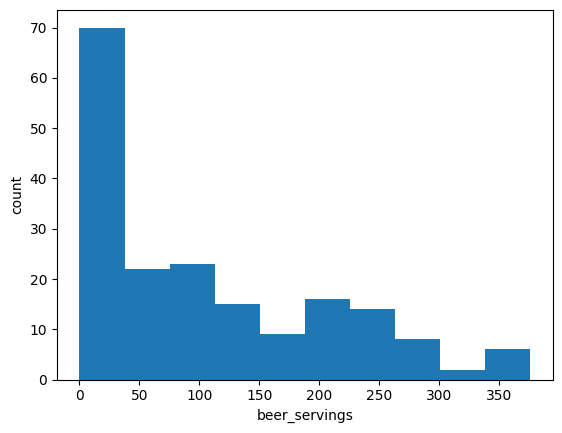

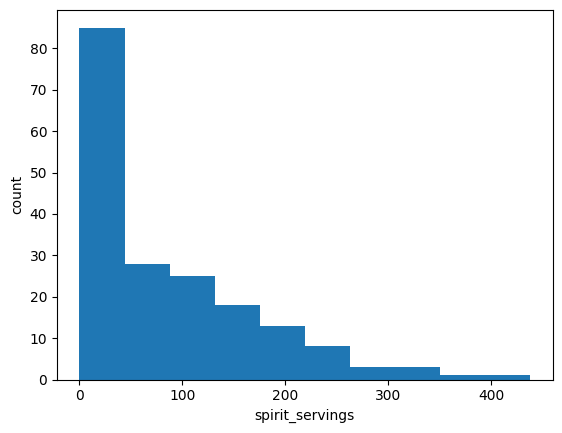

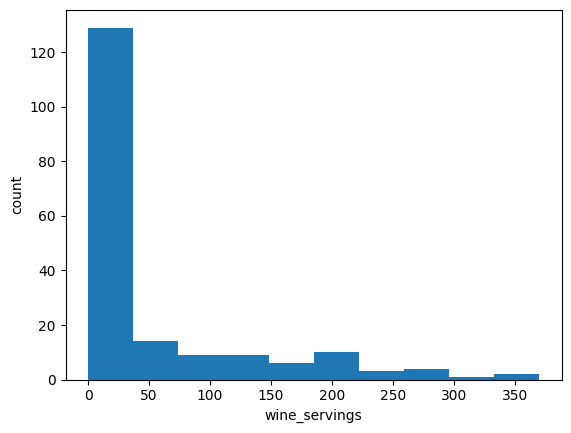

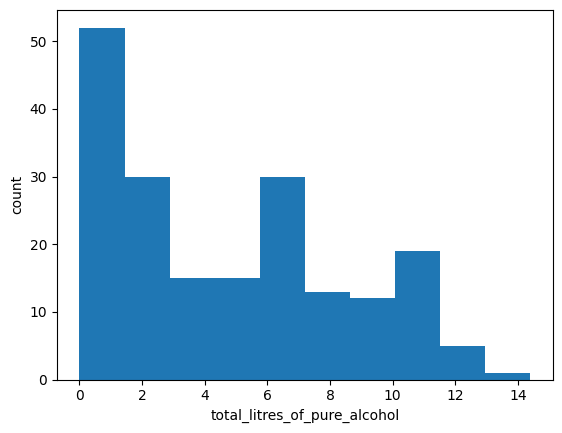

In [8]:
num_cols = num_df.columns.tolist()
print(num_cols)

for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


In [9]:
# fill the missing values with median
for col in num_cols:
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [10]:
num_df.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

## outlier handling

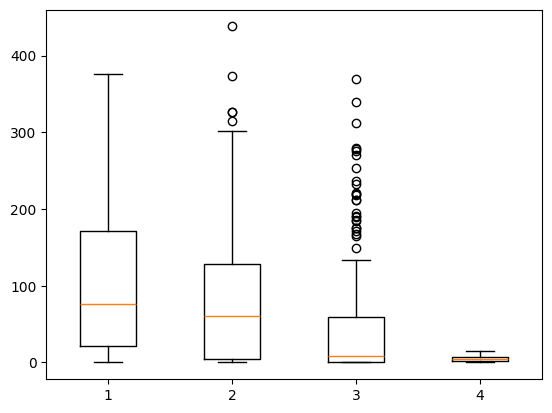

In [159]:
plt.boxplot(num_df)
plt.show()

In [11]:
def replace_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bond = q3 + 1.5*iqr
    lower_bond = q1 - 1.5*iqr
    df[column_name] = df[column_name].clip(upper = upper_bond)  # to replace value above upper bomd to upper bond
    df[column_name] = df[column_name].clip(lower = lower_bond)  # replace with lower bond
    return df[column_name]




In [12]:
for col in num_cols:
    num_df[col] = replace_outliers(num_df,col)

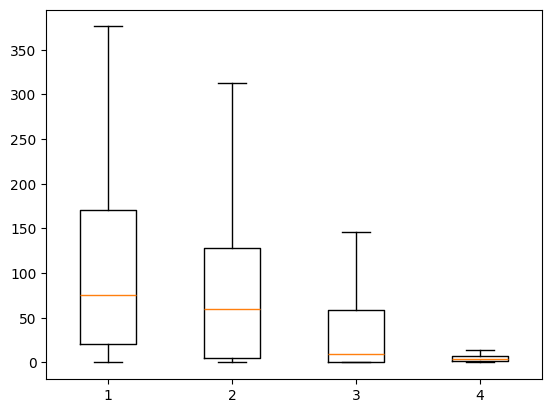

In [162]:
plt.boxplot(num_df)
plt.show()

## Data normalization

### Min - max scaling
### standard scaling

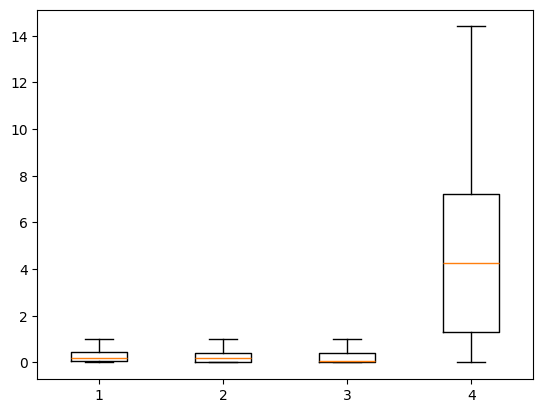

In [13]:
# min max
for col in num_cols[:-1]:
    num_df[col] = (num_df[col] - num_df[col].min())/(num_df[col].max() - num_df[col].min())


num_df
plt.boxplot(num_df)
plt.show()



In [ ]:
# standard scaling
# for col in num_cols[:-1]:
#     num_df[col] = (num_df[col] - num_df[col].mean())/num_df[col].std()

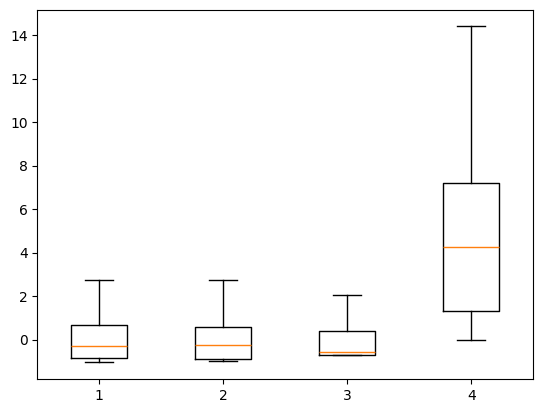

In [ ]:
# plt.boxplot(num_df)
# plt.show()

## Scaling with library


In [ ]:
# # pip install scikit-learn


# from sklearn.preprocessing import MinMaxScaler
# min_max_scalar = MinMaxScaler()

# num_df = min_max_scalar.fit_transform(num_df)


# num_df

array([[0.        , 0.        , 0.        , 0.        ],
       [0.23670213, 0.4224    , 0.36986301, 0.34027778],
       [0.06648936, 0.        , 0.09589041, 0.04861111],
       [0.65159574, 0.4416    , 1.        , 0.86111111],
       [0.57712766, 0.1824    , 0.30821918, 0.40972222],
       [0.2712766 , 0.4096    , 0.30821918, 0.34027778],
       [0.20212766, 0.08      , 1.        , 0.57638889],
       [0.05585106, 0.5728    , 0.07534247, 0.26388889],
       [0.69414894, 0.2304    , 1.        , 0.72222222],
       [0.74202128, 0.24      , 1.        , 0.67361111],
       [0.05585106, 0.1472    , 0.03424658, 0.09027778],
       [0.32446809, 0.5632    , 0.34931507, 0.4375    ],
       [0.11170213, 0.2016    , 0.04794521, 0.13888889],
       [0.20212766, 0.192     , 0.06164384, 0.29513889],
       [0.38031915, 0.5536    , 0.24657534, 0.4375    ],
       [0.37765957, 1.        , 0.28767123, 1.        ],
       [0.78457447, 0.2688    , 1.        , 0.72916667],
       [0.69946809, 0.3648    ,

In [ ]:
# from sklearn.preprocessing import StandardScaler
# std_scalar = StandardScaler()
# num_df = std_scalar.fit_transform(num_df)

# num_df

array([[-1.05687979e+00, -9.71266575e-01, -7.23135524e-01,
        -1.26435580e+00],
       [-1.51713050e-01,  6.08758792e-01,  3.02520223e-01,
         4.29216068e-02],
       [-8.02619473e-01, -9.71266575e-01, -4.57224775e-01,
        -1.07760189e+00],
       [ 1.43487136e+00,  6.80578127e-01,  2.04993372e+00,
         2.04385641e+00],
       [ 1.15009980e+00, -2.88982894e-01,  1.31577599e-01,
         3.09712915e-01],
       [-1.94976827e-02,  5.60879235e-01,  1.31577599e-01,
         4.29216068e-02],
       [-2.83928417e-01, -6.72019346e-01,  2.04993372e+00,
         9.50012053e-01],
       [-8.43301125e-01,  1.17134358e+00, -5.14205650e-01,
        -2.50548832e-01],
       [ 1.59759796e+00, -1.09434556e-01,  2.04993372e+00,
         1.51027380e+00],
       [ 1.78066539e+00, -7.35248890e-02,  2.04993372e+00,
         1.32351988e+00],
       [-8.43301125e-01, -4.20651674e-01, -6.28167399e-01,
        -9.17527101e-01],
       [ 1.83910575e-01,  1.13543391e+00,  2.45539348e-01,
      

In [164]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler()
num_df1 = min_max_scalar.fit_transform(num_df)

import pickle

with open("min_max_scalar.pkl","wb") as f:
    pickle.dump(min_max_scalar,f)
    

In [165]:
with open("min_max_scalar.pkl","rb") as f :
    min_max_scalar = pickle.load(f)


In [ ]:
# test_input = np.array([[200,100,300,400]])

# test_output = min_max_scalar.transform(test_input)
# print(test_output)

[[ 52.71262311  27.06293269 108.72551117  27.77777778]]


c:\AI_ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Encoding of categorical Variables

### One-hot Encoding

In [ ]:
# data = {'color' : ['yellow','green','blue','yellow','green']}
# df = pd.DataFrame(data)
# df

,color
0,yellow
1,green
2,blue
3,yellow
4,green


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)
# encoded_data = encoder.fit_transform(df[['color']])
# encoded_df = pd.DataFrame(encoded_data,columns=['blue','green','yellow'])
# final_df = pd.concat([df,encoded_df],axis =1)
# final_df

,color,blue,green,yellow
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


### Label encoding

In [ ]:

# data = {'color' : ['red','green','blue','red','green','yellow']}
# df = pd.DataFrame(data)
# df

,color
0,red
1,green
2,blue
3,red
4,green
5,yellow


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df['color_encoded'] = encoder.fit_transform(df['color'])
# df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,red,2
4,green,1
5,yellow,3


In [14]:
cat_df
cat_columns = cat_df.columns.to_list()

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in cat_columns:
    encoder = LabelEncoder()
    cat_df[col] = encoder.fit_transform(cat_df[col])


cat_df    

,country,continent
0,0,1
1,1,2
2,2,0
3,3,2
4,4,0
...,...,...
188,188,5
189,189,1
190,190,1
191,191,0


In [167]:
import pickle

with open("label_encoder.pkl","wb") as f:
    pickle.dump(encoder,f)

    

In [168]:
with open("label_encoder.pkl","rb") as f:
    encoder = pickle.load(f)



In [16]:
final_df1 = pd.concat([num_df,cat_df],axis = 1)
final_df1

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,0.000000,0.0000,0.000000,0.0,0,1
1,0.236702,0.4224,0.369863,4.9,1,2
2,0.066489,0.0000,0.095890,0.7,2,0
3,0.651596,0.4416,1.000000,12.4,3,2
4,0.577128,0.1824,0.308219,5.9,4,0
...,...,...,...,...,...,...
188,0.202128,0.3200,0.020548,7.7,188,5
189,0.295213,0.0064,0.006849,2.0,189,1
190,0.015957,0.0000,0.000000,0.1,190,1
191,0.085106,0.0608,0.027397,2.5,191,0


## seperate features and labeling

In [17]:
y = final_df1["total_litres_of_pure_alcohol"]
X = final_df1.drop("total_litres_of_pure_alcohol",axis = 1)


## train  test split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train

,beer_servings,spirit_servings,wine_servings,country,continent
19,0.061170,0.0000,0.000000,19,1
109,0.632979,0.2176,0.034247,109,3
63,0.021277,0.0000,0.006849,62,0
93,0.747340,0.6912,0.424658,92,2
179,0.119681,0.1920,0.000000,181,0
...,...,...,...,...,...
59,0.204787,0.1120,0.006849,58,4
54,0.138298,0.2208,0.013699,53,3
149,0.202128,0.0160,0.000000,146,1
94,0.053191,0.1760,0.212329,93,1


# Feature engineering


## Corelation analysis

In [21]:


reg_lin = LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred = reg_lin.predict(X_test)
y_pred

array([ 1.25619871,  8.0419556 ,  1.06236138,  6.70513785,  9.36013021,
       10.60945234,  6.38601363,  1.237613  ,  3.09231315,  8.46419318,
        5.74206805,  3.37352231, 10.10096851,  1.1338997 ,  5.56598084,
        9.50171679,  1.04424903,  8.06926215,  1.2146352 ,  5.40975652,
        1.25403457,  2.36722114,  2.87026045,  9.90017925,  7.47200137,
        5.34608514,  2.75252267,  6.2982246 ,  4.04461241,  7.46593483,
        1.31465788,  2.3952659 ,  6.75092405,  8.12316408,  1.08547006,
        3.10646513,  4.53583947,  6.7983191 ,  2.47828065])

In [25]:
mse = mean_squared_error(y_test,y_pred)
mse

r2 = r2_score(y_test,y_pred)
r2

0.861523284758204

In [175]:
cor_val = final_df1.corr()
cor_val

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
beer_servings,1.000000,0.473518,0.617509,0.829418,-0.068053,0.315772
spirit_servings,0.473518,1.000000,0.280068,0.659014,-0.067768,0.391200
wine_servings,0.617509,0.280068,1.000000,0.716568,-0.084139,0.250489
total_litres_of_pure_alcohol,0.829418,0.659014,0.716568,1.000000,-0.064935,0.308496
country,-0.068053,-0.067768,-0.084139,-0.064935,1.000000,-0.018690
continent,0.315772,0.391200,0.250489,0.308496,-0.018690,1.000000


<Axes: >

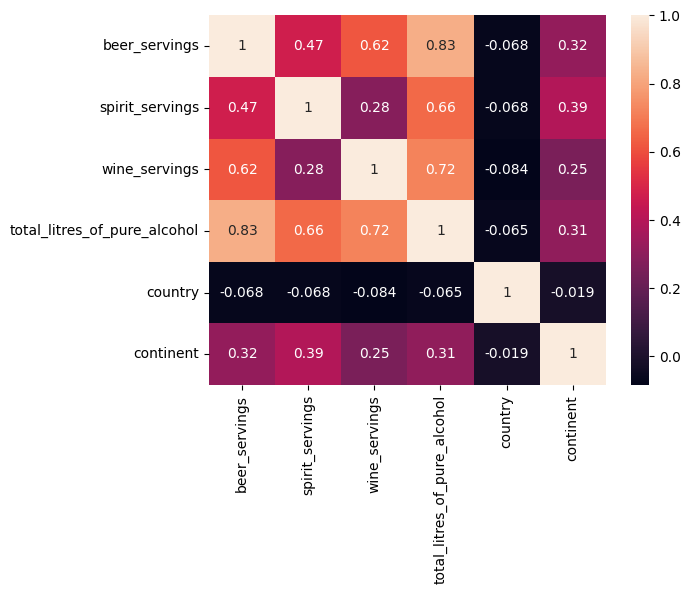

In [181]:
min_corr = cor_val['total_litres_of_pure_alcohol'][:-1].min()
min_corr
sns.heatmap(cor_val, annot=True)

In [182]:
drop_threshold = 0.67
cor_val['total_litres_of_pure_alcohol'][:-1]
cor_val[cor_val['total_litres_of_pure_alcohol']==min_corr].index.to_list()

['country']

In [183]:


cols_to_drop= cor_val[abs(cor_val['total_litres_of_pure_alcohol'])]

KeyError: "None of [Index([ 0.8294180825916242,  0.6590135557802802,  0.7165683544516236,\n                       1.0, 0.06493549046406018, 0.30849569898905904],\n      dtype='float64')] are in the [columns]"

## log transformation